<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/>Problem Statement

<span style="font-family:Calibri; font-size:1.2em;">The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Import all Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Import the dataset

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Data head & tail

In [3]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
stock_prices.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Shape of the dataset

In [5]:
stock_prices.shape

(314, 11)

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Dataset column header

In [6]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank',
       'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways'],
      dtype='object')

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Fixing the messy column header

In [7]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '').str.replace('&','')

In [8]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Check the number of rows (observations) and the number of columns (variables)

In [9]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Checking the data type of the dataset

In [10]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                314 non-null    object
 1   Infosys             314 non-null    int64 
 2   Indian_Hotel        314 non-null    int64 
 3   Mahindra__Mahindra  314 non-null    int64 
 4   Axis_Bank           314 non-null    int64 
 5   SAIL                314 non-null    int64 
 6   Shree_Cement        314 non-null    int64 
 7   Sun_Pharma          314 non-null    int64 
 8   Jindal_Steel        314 non-null    int64 
 9   Idea_Vodafone       314 non-null    int64 
 10  Jet_Airways         314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Statistical analysis of the dataset

In [11]:
stock_prices.describe(include='all')

,Date,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
unique,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,NaN,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,NaN,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,NaN,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,NaN,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,NaN,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000


In [12]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Lets us plot & see price trend over time for different companies

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='green'/>Year Vs Infosys

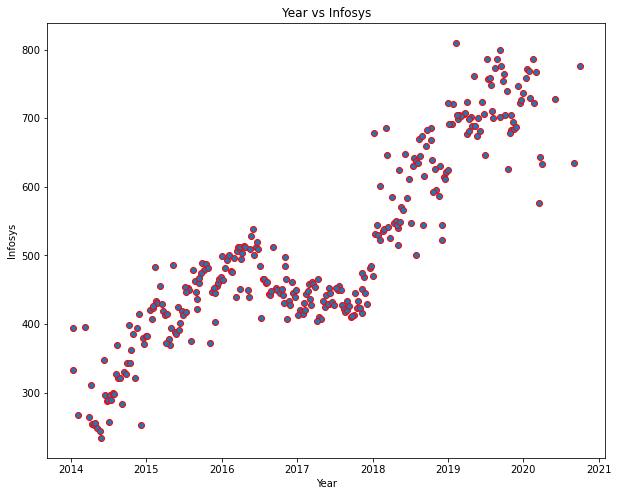

In [13]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Infosys')

plt.show()


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='green'/>Year vs Mahindra & Mahindra

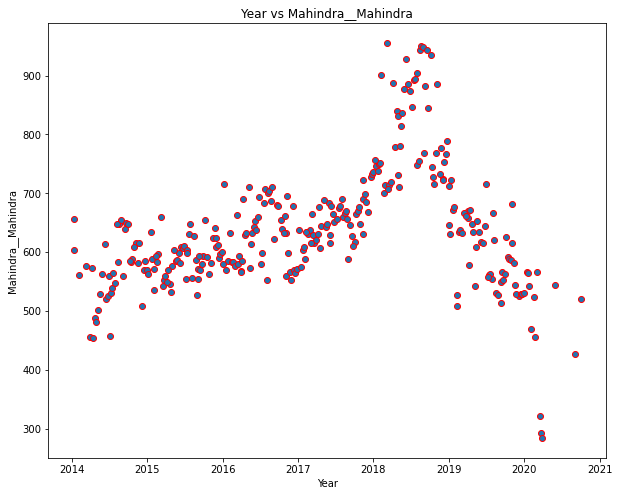

In [14]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra__Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra__Mahindra')
plt.title('Year vs Mahindra__Mahindra')

plt.show()

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='green'/>Year VS Axis Bank

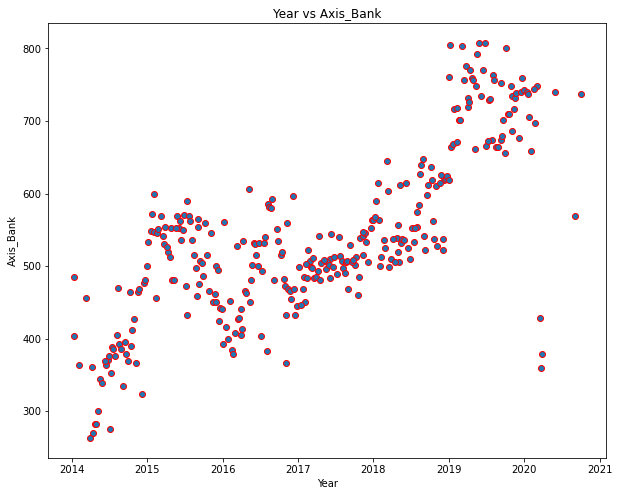

In [15]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Year vs Axis_Bank')

plt.show()

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='green'/>Year vs Shree Cements

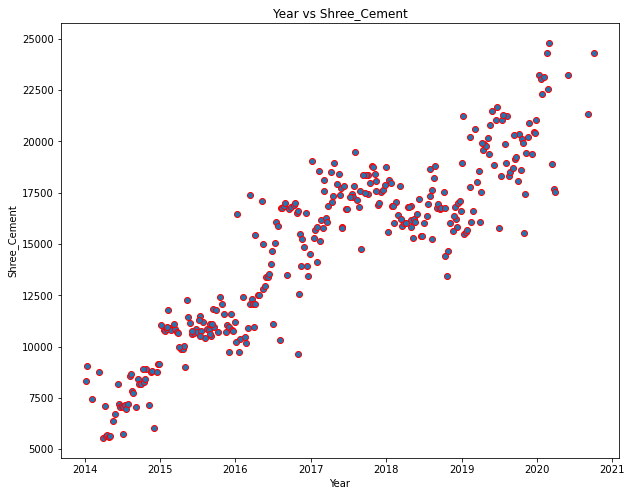

In [16]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Shree_Cement'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Year vs Shree_Cement')

plt.show()

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='green'/>Year Vs Jet Airways

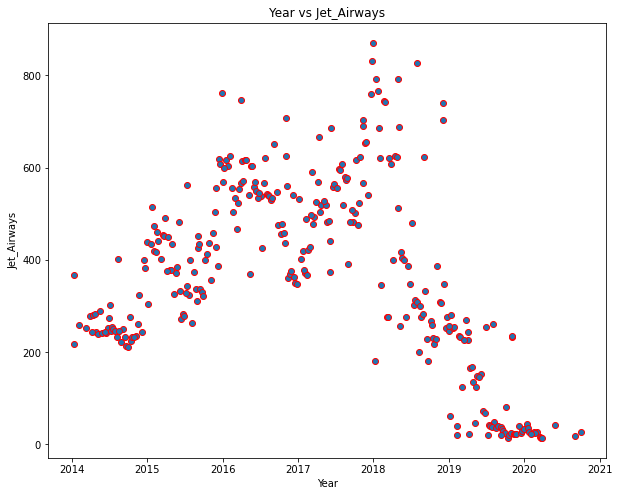

In [17]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jet_Airways'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Year vs Jet_Airways')

plt.show()

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Analyzing returns

In [18]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Checking the rows & columns of dataset

In [19]:
stock_returns.shape

(314, 10)

In [20]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>We now look at Means & Standard Deviations of these returns

In [21]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys               0.002794
Indian_Hotel          0.000266
Mahindra__Mahindra   -0.001506
Axis_Bank             0.001167
SAIL                 -0.003463
Shree_Cement          0.003681
Sun_Pharma           -0.001455
Jindal_Steel         -0.004123
Idea_Vodafone        -0.010608
Jet_Airways          -0.009548
dtype: float64

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Calculating stock standard deviation

In [22]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.035070
Indian_Hotel          0.047131
Mahindra__Mahindra    0.040169
Axis_Bank             0.045828
SAIL                  0.062188
Shree_Cement          0.039917
Sun_Pharma            0.045033
Jindal_Steel          0.075108
Idea_Vodafone         0.104315
Jet_Airways           0.097972
dtype: float64

<B/><span style="font-family:Calibri; font-size:1.2em;"><font color='blue'/>Let us plot & see what they say about stock prices

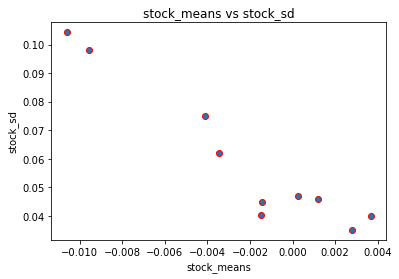

In [23]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()